In [441]:
# link to the dataset
# https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction/code

In [442]:
#importing the required libraries for analysis purposes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [443]:
#uploading the dataset
df=pd.read_csv('Invistico_Airline.csv')

In [444]:
df.head()  # explore the dataset

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [445]:
df.dtypes   # exploring data types

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [446]:
df.info()# here we observe the datatypes of variables in the dataset and the count of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [447]:
# look at the null values in the dataset
df.isnull().sum()   # only Arrivaal Delay in Minutes

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [448]:
df.shape

(129880, 23)

In [449]:
# data cleaning and handling missing values

Counts of each class
satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


(129880, 23)

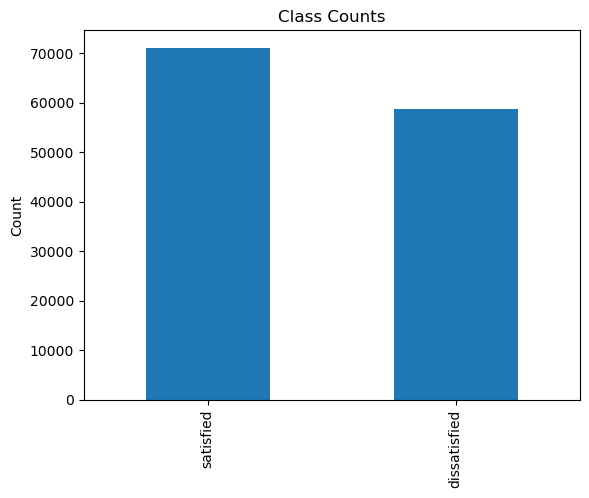

In [450]:
# as identified above 'Arrrival Delay in Minutes' has 393 null values
# we can drop all these null values however we must first ensure there isnt much of a change in the class balance of our target variable
print("Counts of each class")
print(df["satisfaction"].value_counts())
df['satisfaction'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts')
df.shape
# we classes arent very imbalanced
# percentage wise we see 54.7% satisfied and 45.3 %  dissatisfied

Counts of each class
satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64


(129487, 23)

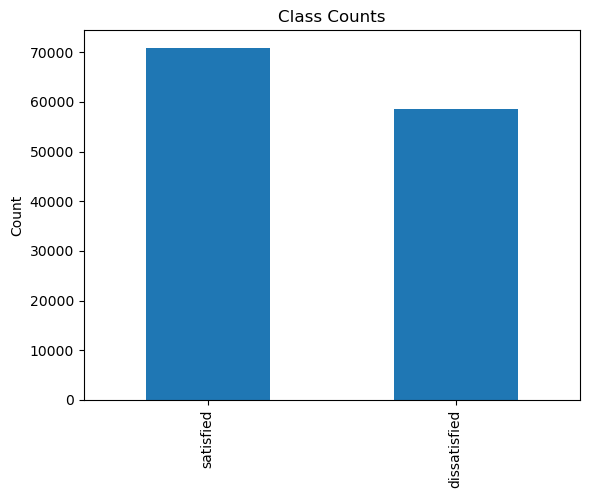

In [451]:
df1=df.dropna()
print("Counts of each class")
print(df1["satisfaction"].value_counts())
df1['satisfaction'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts')
df1.shape
# percentagewise 54.7% are satisfied 45.3% dissatisfied
# we see no difference in class balance after dropping the null values in the dataframe
#therefore we drop all null values 

# Exploratory Data Analysis

In [452]:
for i in df[1:]:
    print(f'Colname: {i},min :{df[i].min()}, max :{df[i].max()}')
# we are trying to find any outliers that may exist in the dataset 

Colname: satisfaction,min :dissatisfied, max :satisfied
Colname: Gender,min :Female, max :Male
Colname: Customer Type,min :Loyal Customer, max :disloyal Customer
Colname: Age,min :7, max :85
Colname: Type of Travel,min :Business travel, max :Personal Travel
Colname: Class,min :Business, max :Eco Plus
Colname: Flight Distance,min :50, max :6951
Colname: Seat comfort,min :0, max :5
Colname: Departure/Arrival time convenient,min :0, max :5
Colname: Food and drink,min :0, max :5
Colname: Gate location,min :0, max :5
Colname: Inflight wifi service,min :0, max :5
Colname: Inflight entertainment,min :0, max :5
Colname: Online support,min :0, max :5
Colname: Ease of Online booking,min :0, max :5
Colname: On-board service,min :0, max :5
Colname: Leg room service,min :0, max :5
Colname: Baggage handling,min :1, max :5
Colname: Checkin service,min :0, max :5
Colname: Cleanliness,min :0, max :5
Colname: Online boarding,min :0, max :5
Colname: Departure Delay in Minutes,min :0, max :1592
Colname: A

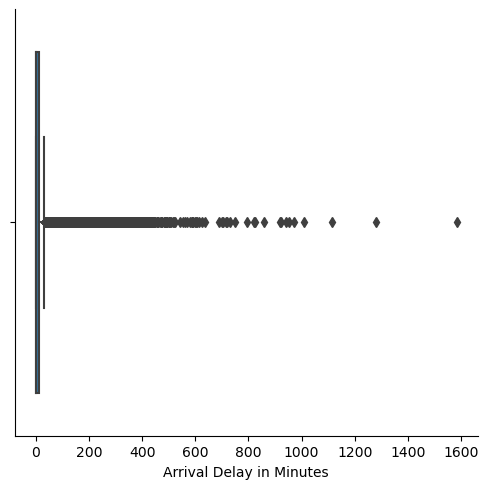

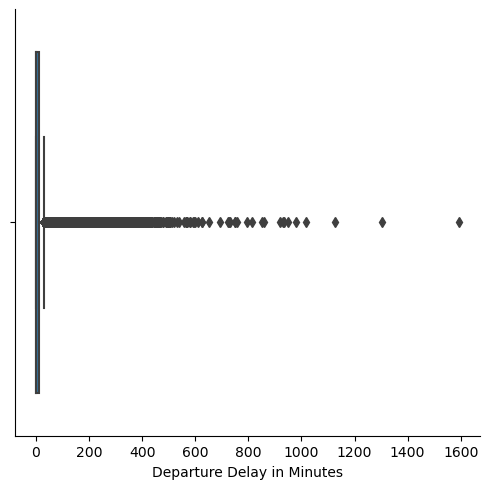

In [453]:
#lets look into departure and arrival delays
# we see some extreme in 'Arrival Delays in Minutes' and 'Departure Delays in Minutes'
sns.catplot(x='Arrival Delay in Minutes', data=df1, kind='box')
sns.catplot(x='Departure Delay in Minutes', data=df1, kind='box')

In [454]:
a=df1['Arrival Delay in Minutes'].quantile(q=0.99)
print(a)
df2=df1[df1['Arrival Delay in Minutes']<a]  # setting the limit of 'a' on the dataset column 'Arrival Delay in Minutes'
print(df2.shape)                      # 'a' refers to the 99th percentil of the 'Arrival Delay in Minutes' column


b=df1['Departure Delay in Minutes'].quantile(q=0.99)
print(b)
df3=df1[df1['Arrival Delay in Minutes']<b]  # setting the limit of 'a' on the dataset column 'Departure Delay in Minutes'
print(df3.shape)                      # 'a' refers to the 99th percentile of the 'Departure Delay in Minutes' column


182.0
(128185, 23)
180.0
(128149, 23)


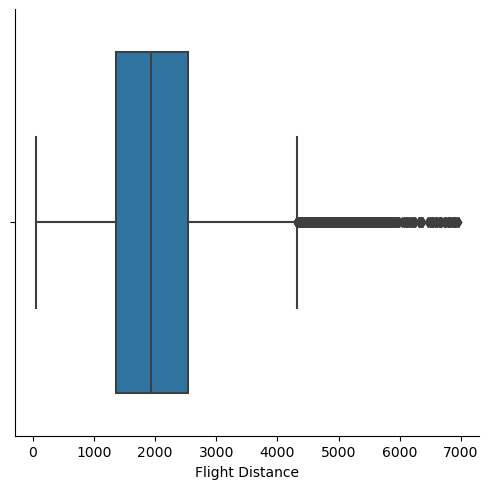

In [455]:
sns.catplot(x='Flight Distance', data=df1, kind='box')
# we do see outliers in our dataset but not extreme outliers as seen in the boxplot

In [456]:
# now we are going concatenate 'df2'  and  'df3' and then remove duplicate rows
# we will redefining df
df=pd.concat([df2,df3]).drop_duplicates()

Counts of each class
satisfied       70408
dissatisfied    57777
Name: satisfaction, dtype: int64


(128185, 23)

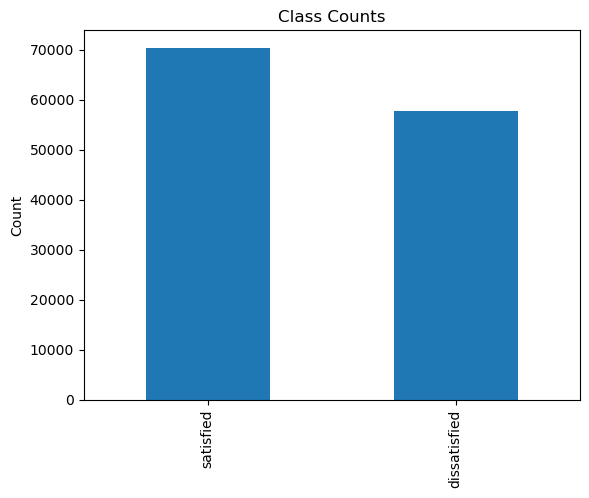

In [457]:
print("Counts of each class")
print(df["satisfaction"].value_counts())
df['satisfaction'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts')
df.shape

# checking the class balance after handling outliers in the dataset
# There isnt much of a difference in the class balance of the target variable 'satisfaction'

In [458]:
# explore our new dataset
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [459]:
df.shape

(128185, 23)


(Please note encoding of categorical data has been done as required for analysis purposes)

In [460]:
# creating a new coliumn called 'Average Delay' that is the average of the arrival delay and departure delay
df['Average Delay']=(df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes'])//2

In [461]:
df.head() # explore the dataset

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Average Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,5,4,5,5,4,2,0,0.0,0.0


In [462]:
df['Average Delay'].value_counts()  # we see no negative values for delays 
                                    # for analysis purposes we consider delays >=0

0.0      63318
1.0       6249
2.0       5055
3.0       4174
4.0       3427
         ...  
189.0        2
191.0        2
192.0        1
195.0        1
186.0        1
Name: Average Delay, Length: 193, dtype: int64

1) 	Do longer flights cause more delays for customers ?

[[1.         0.06603843]
 [0.06603843 1.        ]]


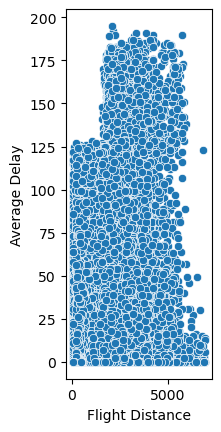

In [463]:
# let us analyse the relationship between flight distance and the delay faced by customers
# let us check if such a relationship exists
plt.subplot(1, 3, 1)
sns.scatterplot(x='Flight Distance', y='Average Delay', data=df)
correlation = np.corrcoef(df['Flight Distance'],df['Average Delay'])
print(correlation)  #weak positive correlation can be seen between flight distance and the delay faced by the customer
                    # therefore flight distance does not really have a big impact on the delays faced on by the customer 
                     # it is fair  to assume delays do impact  customer satisfaction negatively but flight distance isnt a triggering cause for delays
                     

In [464]:
# breaking flight distance into intervals for analysis purposes in order to identify if longer distances incure longer delays on average
def condition(x):
    if 0<=x<1000:
        return '0-1000'
    elif 1000<=x<2000:
        return '1000-2000'
    elif 2000<=x<3000:
        return '2000-3000'
    elif 3000<=x<4000:
        return '3000-4000'
    elif 4000<=x<=5000:
        return '4000-5000'
    elif x>=5000:
        return '5000+'
        
df['Flight Distance Interval']=df['Flight Distance'].apply(lambda x:condition(x))    
new  = df.groupby('Flight Distance Interval')['Average Delay'].mean().reset_index()
new


# we can see as the flight distance get larger the average delay  faced increases by small margin , this is  from 3000-4000 onwards
# however we can see the average delay in the 2000-3000 distance range is more than the delay faced in the 3000-4000 distance range
# this could be due to factors  like air traffic congestion , weather patterns and airport infrastructure etc.

,Flight Distance Interval,Average Delay
0,0-1000,10.281903
1,1000-2000,10.997700
2,2000-3000,13.720005
3,3000-4000,12.535248
4,4000-5000,18.609396
5,5000+,27.549708


<Axes: xlabel='Seat comfort', ylabel='Flight Distance'>

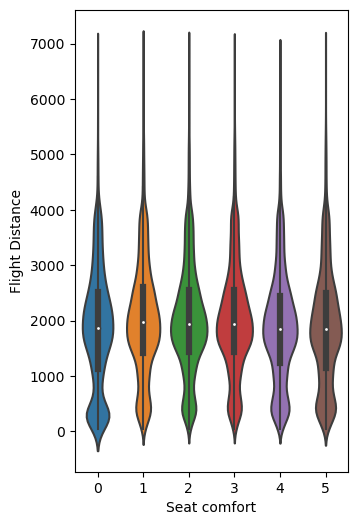

In [465]:
# We now analyse if customers flying longer distances prefer different levels of seat comfort
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 3)
sns.violinplot(x='Seat comfort', y='Flight Distance', data=df)  # the spread in flight distance is quite similar regardless of the seat comfort level

In [466]:
new  = df.groupby('Seat comfort')['Flight Distance'].mean().reset_index()
new=new.rename(columns={'Flight Distance':'Average Flight Distance'})
new  # there isnt really a big difference in seat comfort chosen by customers with relation to flight distance
    

,Seat comfort,Average Flight Distance
0,0,1863.948675
1,1,2035.035472
2,2,2022.498710
3,3,2018.192177
4,4,1893.718680
5,5,1887.595469


2) How much of an impact does flight delay have on customer satisfaction?

In [467]:
# looking into the relationship between customer sarisfaction and flight delay faced
new  = df.groupby('satisfaction')['Average Delay'].mean().reset_index()
new  # we can see the average delay  faced by dissatisfied customers is higher than the satisfied customers
      # however the difference between the delays for each class isnt significant  , further analysis is required for inferences to  be made

,satisfaction,Average Delay
0,dissatisfied,14.440002
1,satisfied,10.335416


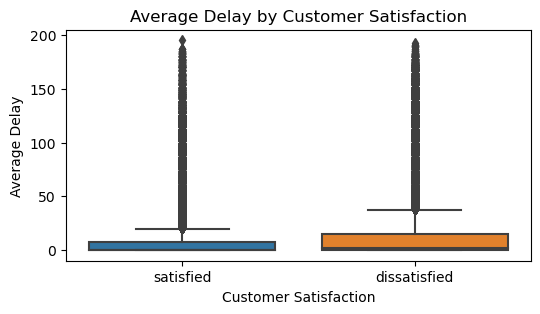

In [468]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='satisfaction', y='Average Delay', data=df)
plt.title('Average Delay by Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Average Delay')
plt.show()

In [469]:

#Correlation Coefficient (Point-Biserial Correlation)
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Convert 'satisfaction' to numeric values using label encoding
label_encoder = LabelEncoder()
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

correlation= pointbiserialr(df['satisfaction'], df['Average Delay'])
correlation
#There is a slight tendency for customer satisfaction to decrease as flight delay increases
#the correlation is very weak, and other factors are likely play a more substantial role in determining customer satisfaction levels.

SignificanceResult(statistic=-0.07914122601099738, pvalue=3.6604703314490594e-177)

In [470]:
#flight distance and type of travel
new  = df.groupby('Type of Travel')['Flight Distance'].mean().reset_index()
new=new.rename(columns={'Flight Distance':'Average Flight Distance'})
new

,Type of Travel,Average Flight Distance
0,Business travel,2054.49791
1,Personal Travel,1784.38123


Text(0, 0.5, 'Flight Distance')

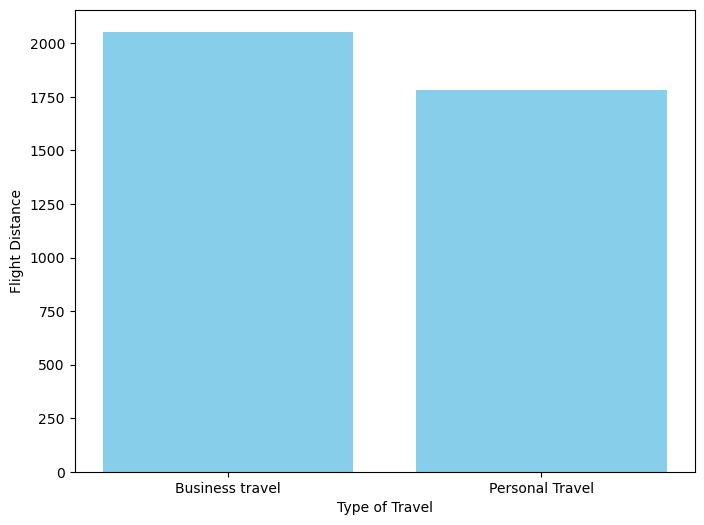

In [471]:
# let us visualize the above dataset in a barplot
plt.figure(figsize=(8, 6))
plt.bar(new['Type of Travel'], new['Average Flight Distance'], color='skyblue')
plt.xlabel('Type of Travel')
plt.ylabel('Flight Distance')
# on average business travel flies longer distances than personal travel

In [472]:
# looking into the level of customer loyalty across the travel purpose of the consumer
new  = df.groupby('Type of Travel')['Customer Type'].value_counts() 
new
# customer loyalty of total customers for business travel is 74% appproximately
# customer loyalty of total customers for personal travel is 99.5% approximately

Type of Travel   Customer Type    
Business travel  Loyal Customer       65257
                 disloyal Customer    23259
Personal Travel  Loyal Customer       39472
                 disloyal Customer      197
Name: Customer Type, dtype: int64

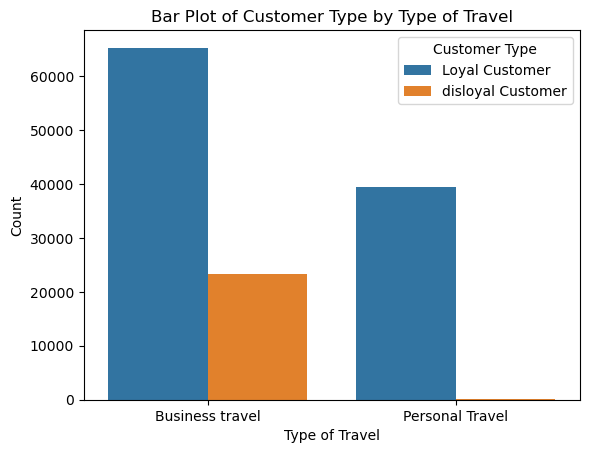

In [473]:
# let us visualize the above data in a barplot
# Reset index to make 'Type of Travel' and 'Customer Type' as columns
new = new.reset_index(name='Count')
sns.barplot(data=new, x='Type of Travel', y='Count', hue='Customer Type')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Type by Type of Travel')
plt.show()  # we dont see disloyal customers for  personal travel because this value is relatively low in comparison to other values
            # its approximately 0.5% of all consumers which is a relatively small value

Class     Customer Type    
Business  Loyal Customer       52275
          disloyal Customer     9118
Eco       Loyal Customer       44062
          disloyal Customer    13435
Eco Plus  Loyal Customer        8392
          disloyal Customer      903
Name: Customer Type, dtype: int64


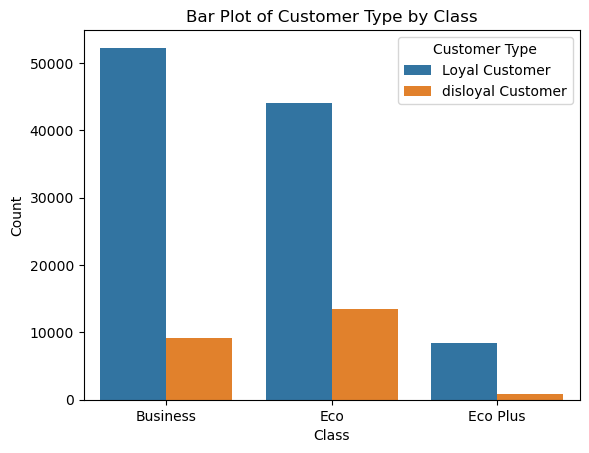

In [474]:
# now we look into the level of customer loyalty across the different classes of travel chosen by customers
new  = df.groupby('Class')['Customer Type'].value_counts() 
print(new)
# we see approximately 85% of all business class customers are regarded as loyal
# we see approximately 76% of all eco class customers are regarded as loyal
# we see approximately 90% of all eco plus customers are regarded as loyal
new = new.reset_index(name='Count')
sns.barplot(data=new, x='Class', y='Count', hue='Customer Type')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Type by Class')
plt.show()

Class     satisfaction
Business  1               43612
          0               17781
Eco       0               34692
          1               22805
Eco Plus  0                5304
          1                3991
Name: satisfaction, dtype: int64


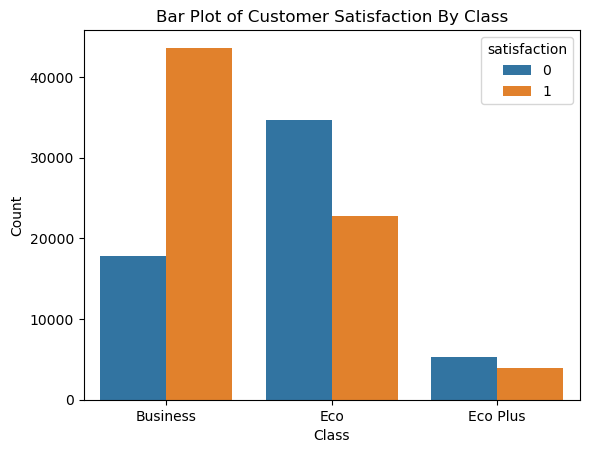

In [475]:
# customer loyalty across all classes are very promising , now let us cross reference this with customer satisfaction
new  = df.groupby('Class')['satisfaction'].value_counts()
print(new)
# We see approximately 71% of all business class customers are satisfied
# we see approximately 40% of all eco class customers are satisfied
# we see appromimately 43% of all eco pluss customers are satisfied
# when compared to the loyalty levels across all the classes and make cross references with customer satisfaction we see that the customer satisfaction levels are very low
# it is possible that our customer loyalty is related to the  service provided by the company in relation to competitors for example affordable prices , easy booking etc..
# but customer satisfaction could be affected by many other factors besides customer loyalty  as proved above


new = new.reset_index(name='Count')
sns.barplot(data=new, x='Class', y='Count', hue='satisfaction')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Satisfaction By Class')
plt.show()

In [476]:
df.head()  # explore the dataset

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Average Delay,Flight Distance Interval
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0.0,0.0,0-1000
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0.0,0.0,2000-3000
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,0,1,4,1,3,0,0.0,0.0,0-1000
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,0,2,4,2,5,0,0.0,0.0,0-1000
5,1,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,5,4,5,5,4,2,0,0.0,0.0,1000-2000


Gender  satisfaction
Female  1               42561
        0               22493
Male    0               35284
        1               27847
Name: satisfaction, dtype: int64


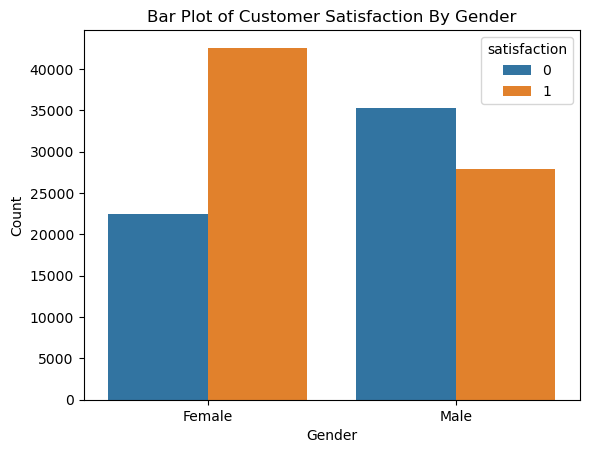

In [477]:
# let us explore the satisfaction level across the genders
new  = df.groupby('Gender')['satisfaction'].value_counts()
print(new)


# 65% of all female passengers are satisfied , where total female passengers count to 65054
# 44.1% of all males are satisfied , where total male passengers count to 63131
# we see a difference in satisfaction levels across the genders ,this is interesting as to why one gender is more satisfied than the other
#This could be due to many reasons like service levels , overall experience etc..


# now let us explore this in a bar plot
new = new.reset_index(name='Count')
sns.barplot(data=new, x='Gender', y='Count', hue='satisfaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Satisfaction By Gender')
plt.show()

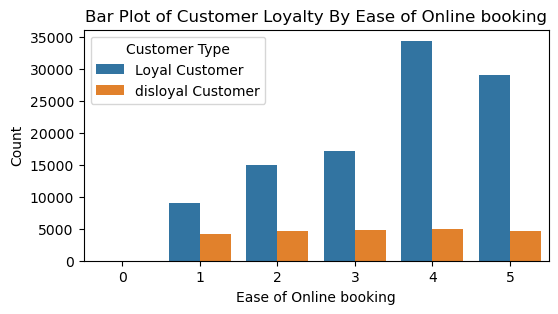

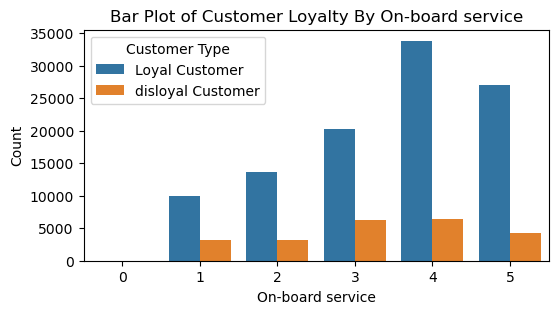

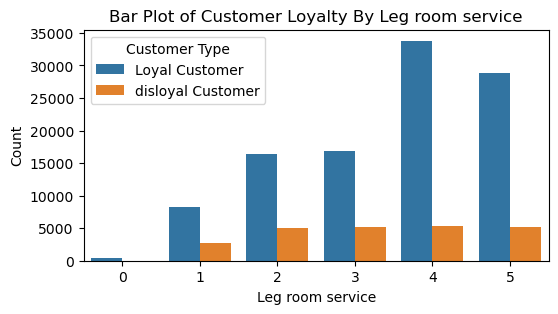

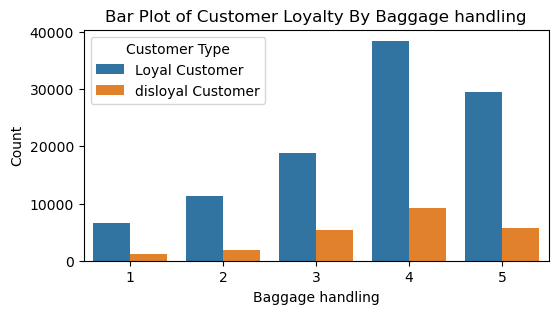

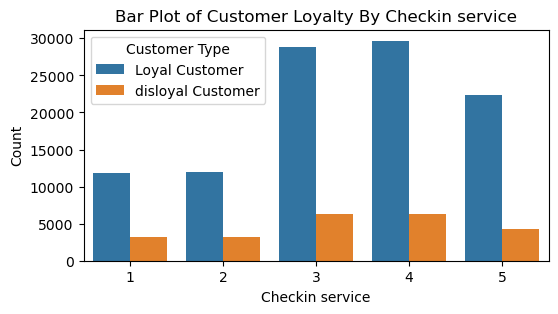

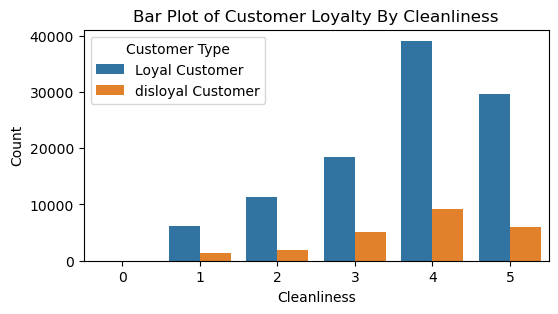

In [478]:
# now let us explore the relationship between 'Customer Type' across the following categorical variables
# 'Ease of Online booking' , 'On-board service' , 'Leg room service' , 'Baggage handling' , 'Checkin Service' , 'Cleanliness'

columns = ['Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

for i in columns:
    new= df.groupby(i)['Customer Type'].value_counts().reset_index(name='Count')
    plt.figure(figsize=(6,3))  # Adjust figure size if needed
    sns.barplot(data=new, x=i, y='Count', hue='Customer Type')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of Customer Loyalty By {i}')
# note that scales have been used for the categorical variables whereas the lowest rating is '0'or '1' depending on the variable and the highest being '5'

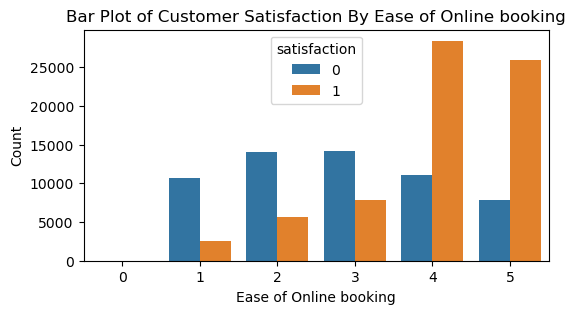

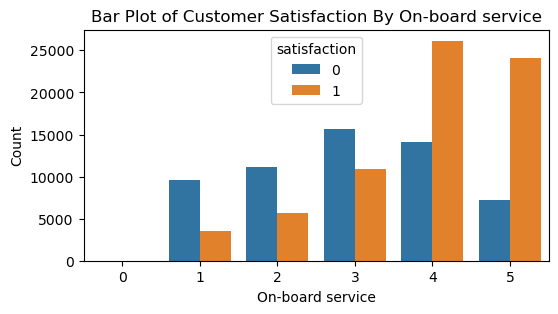

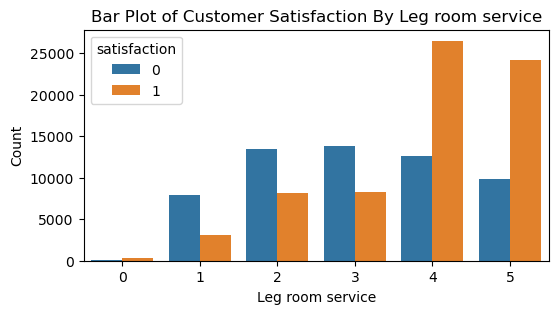

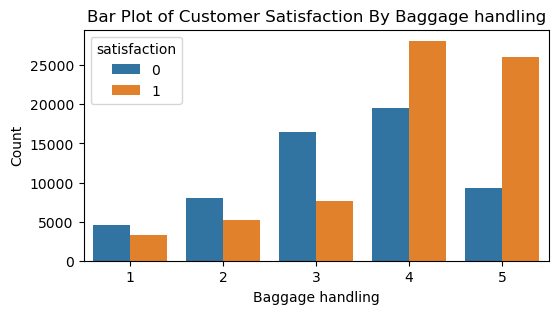

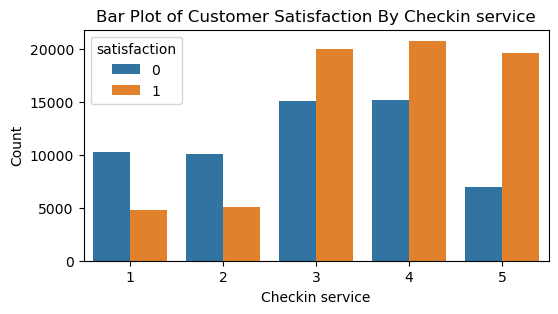

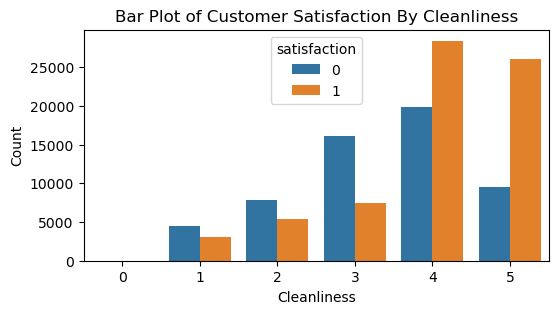

In [479]:
# now let us explore the relationship between 'satisfaction' across the following categorical variables
# 'Ease of Online booking' , 'On-board service' , 'Leg room service' , 'Baggage handling' , 'Checkin Service' , 'Cleanliness'

columns = ['Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

for i in columns:
    new= df.groupby(i)['satisfaction'].value_counts().reset_index(name='Count')
    plt.figure(figsize=(6,3))  
    sns.barplot(data=new, x=i, y='Count', hue='satisfaction')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of Customer Satisfaction By {i}')
    

3)  What are the customer satisfaction levels across all ages?
   

Middle Age      67222
Old             32250
Young Adults    23047
Kids             4720
Very Old          946
Name: Age group, dtype: int64
Age group     satisfaction
Kids          0                2704
              1                2016
Middle Age    1               38085
              0               29137
Old           1               19698
              0               12552
Very Old      0                 661
              1                 285
Young Adults  0               12723
              1               10324
Name: satisfaction, dtype: int64


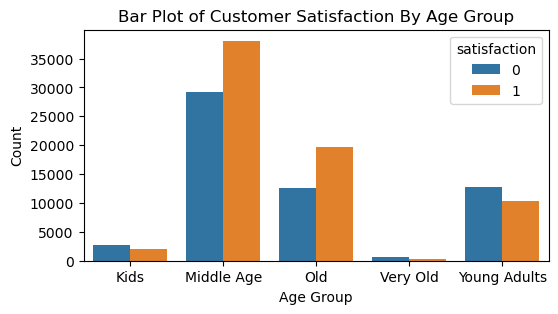

In [480]:
# lets now explore satisfaction levels across different age groups and analyze what age groups of customers are satisfied with our service
condition= lambda age: 'Kids' if age <= 12 else \
                       'Young Adults' if 13 <= age <= 25 else \
                       'Middle Age' if 26 <= age <= 50 else \
                       'Old' if 51 <= age <= 70 else \
                       'Very Old'  #for ages above 70

df['Age group'] = df['Age'].apply(condition)
print(df['Age group'].value_counts())

new  = df.groupby('Age group')['satisfaction'].value_counts()
print(new)

# now let us explore this in a bar plot
new = new.reset_index(name='Count')
plt.figure(figsize=(6,3))
sns.barplot(data=new, x='Age group', y='Count', hue='satisfaction')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Satisfaction By Age Group')
plt.show()

# Note inferences made are done by using the condition defined above as an assumption
# 42.71% of all kids who flew are satisfied 
# 44.8% of all young adults who flew are satisfied
# 56.7% of all middle age consumers who flew are satisfied
# 61.07% of all old age consumers who flew are satisfied 
# 30.1% of very old consumers who flew are satisfied

# the statistics for 'Kids' , 'Young Adults' , ' Very Old' arent promising and research needs to be conducted into these age classifications


4) What is the relationshhip between customer loyalty and customer satisfaction?

Customer Type      satisfaction
Loyal Customer     1               64774
                   0               39955
disloyal Customer  0               17822
                   1                5634
Name: satisfaction, dtype: int64


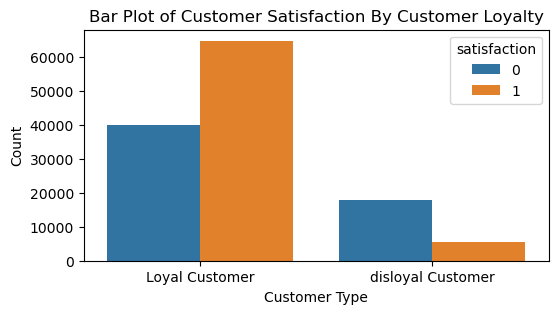

In [481]:
# now lets explore the relationship between customer loyalty and customer satisfaction
new  = df.groupby('Customer Type')['satisfaction'].value_counts()
print(new)




# now let us explore this in a bar plot
new = new.reset_index(name='Count')
plt.figure(figsize=(6,3))
sns.barplot(data=new, x='Customer Type', y='Count', hue='satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Bar Plot of Customer Satisfaction By Customer Loyalty')
plt.show()





# we can see 61.8% of loyal customers are satisfied
# we can see 24% of disloyal customers are satisfied
# Having disloyal customers who are satisfied is promising , the disloyalty can be from them being less informed about the airline services and could be a marketing problem
# we also see 38.2% of loyal customers are dissatisfied which is alarming , therefore research may be required to understand and identify reasons for customer dissatisfaction
# we see of our disloyal customers 76% of them were dissatisfied , it may help to learn from these customers the reasons for their dissatisfaction when making improvements to the airline


In [482]:
# we proceed to encode some of our categorical variables before feature selection and model building
## Gender column
gender = {"Male": 1,"Female": 0}
df['Gender'] = df['Gender'].map(gender) 

## Customer type column 
customer_type= {"Loyal Customer": 1, "disloyal Customer": 0}
df['Customer Type'] = df['Customer Type'].map(customer_type) 

## Type of travel column 
travel_type= {"Business travel": 1, "Personal Travel": 2}
df['Type of Travel'] = df['Type of Travel'].map(travel_type)  

## Class column 
class_mapping = {"Business": 1, "Eco": 2, "Eco Plus": 3}
df['Class'] = df['Class'].map(class_mapping)  


df.head()  #explore the dataset


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Average Delay,Flight Distance Interval,Age group
0,1,0,1,65,2,2,265,0,0,0,...,0,3,5,3,2,0,0.0,0.0,0-1000,Old
2,1,0,1,15,2,2,2138,0,0,0,...,3,4,4,4,2,0,0.0,0.0,2000-3000,Young Adults
3,1,0,1,60,2,2,623,0,0,0,...,0,1,4,1,3,0,0.0,0.0,0-1000,Old
4,1,0,1,70,2,2,354,0,0,0,...,0,2,4,2,5,0,0.0,0.0,0-1000,Old
5,1,1,1,30,2,2,1894,0,0,0,...,4,5,5,4,2,0,0.0,0.0,1000-2000,Middle Age


Feature Selection

In [537]:
print(df.columns)
df1=df.drop(['Age group','Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance Interval'],axis=1) # we will be dropping 'Age group',Departure Delay in Minutes','Arrival Delay in Minutes', 'Flight Distance Interval'as these variables are represented in features under 'Age' and 'Average Delay' and 'Flight Distance'

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Average Delay', 'Flight Distance Interval', 'Age group'],
      dtype='object')


<Axes: >

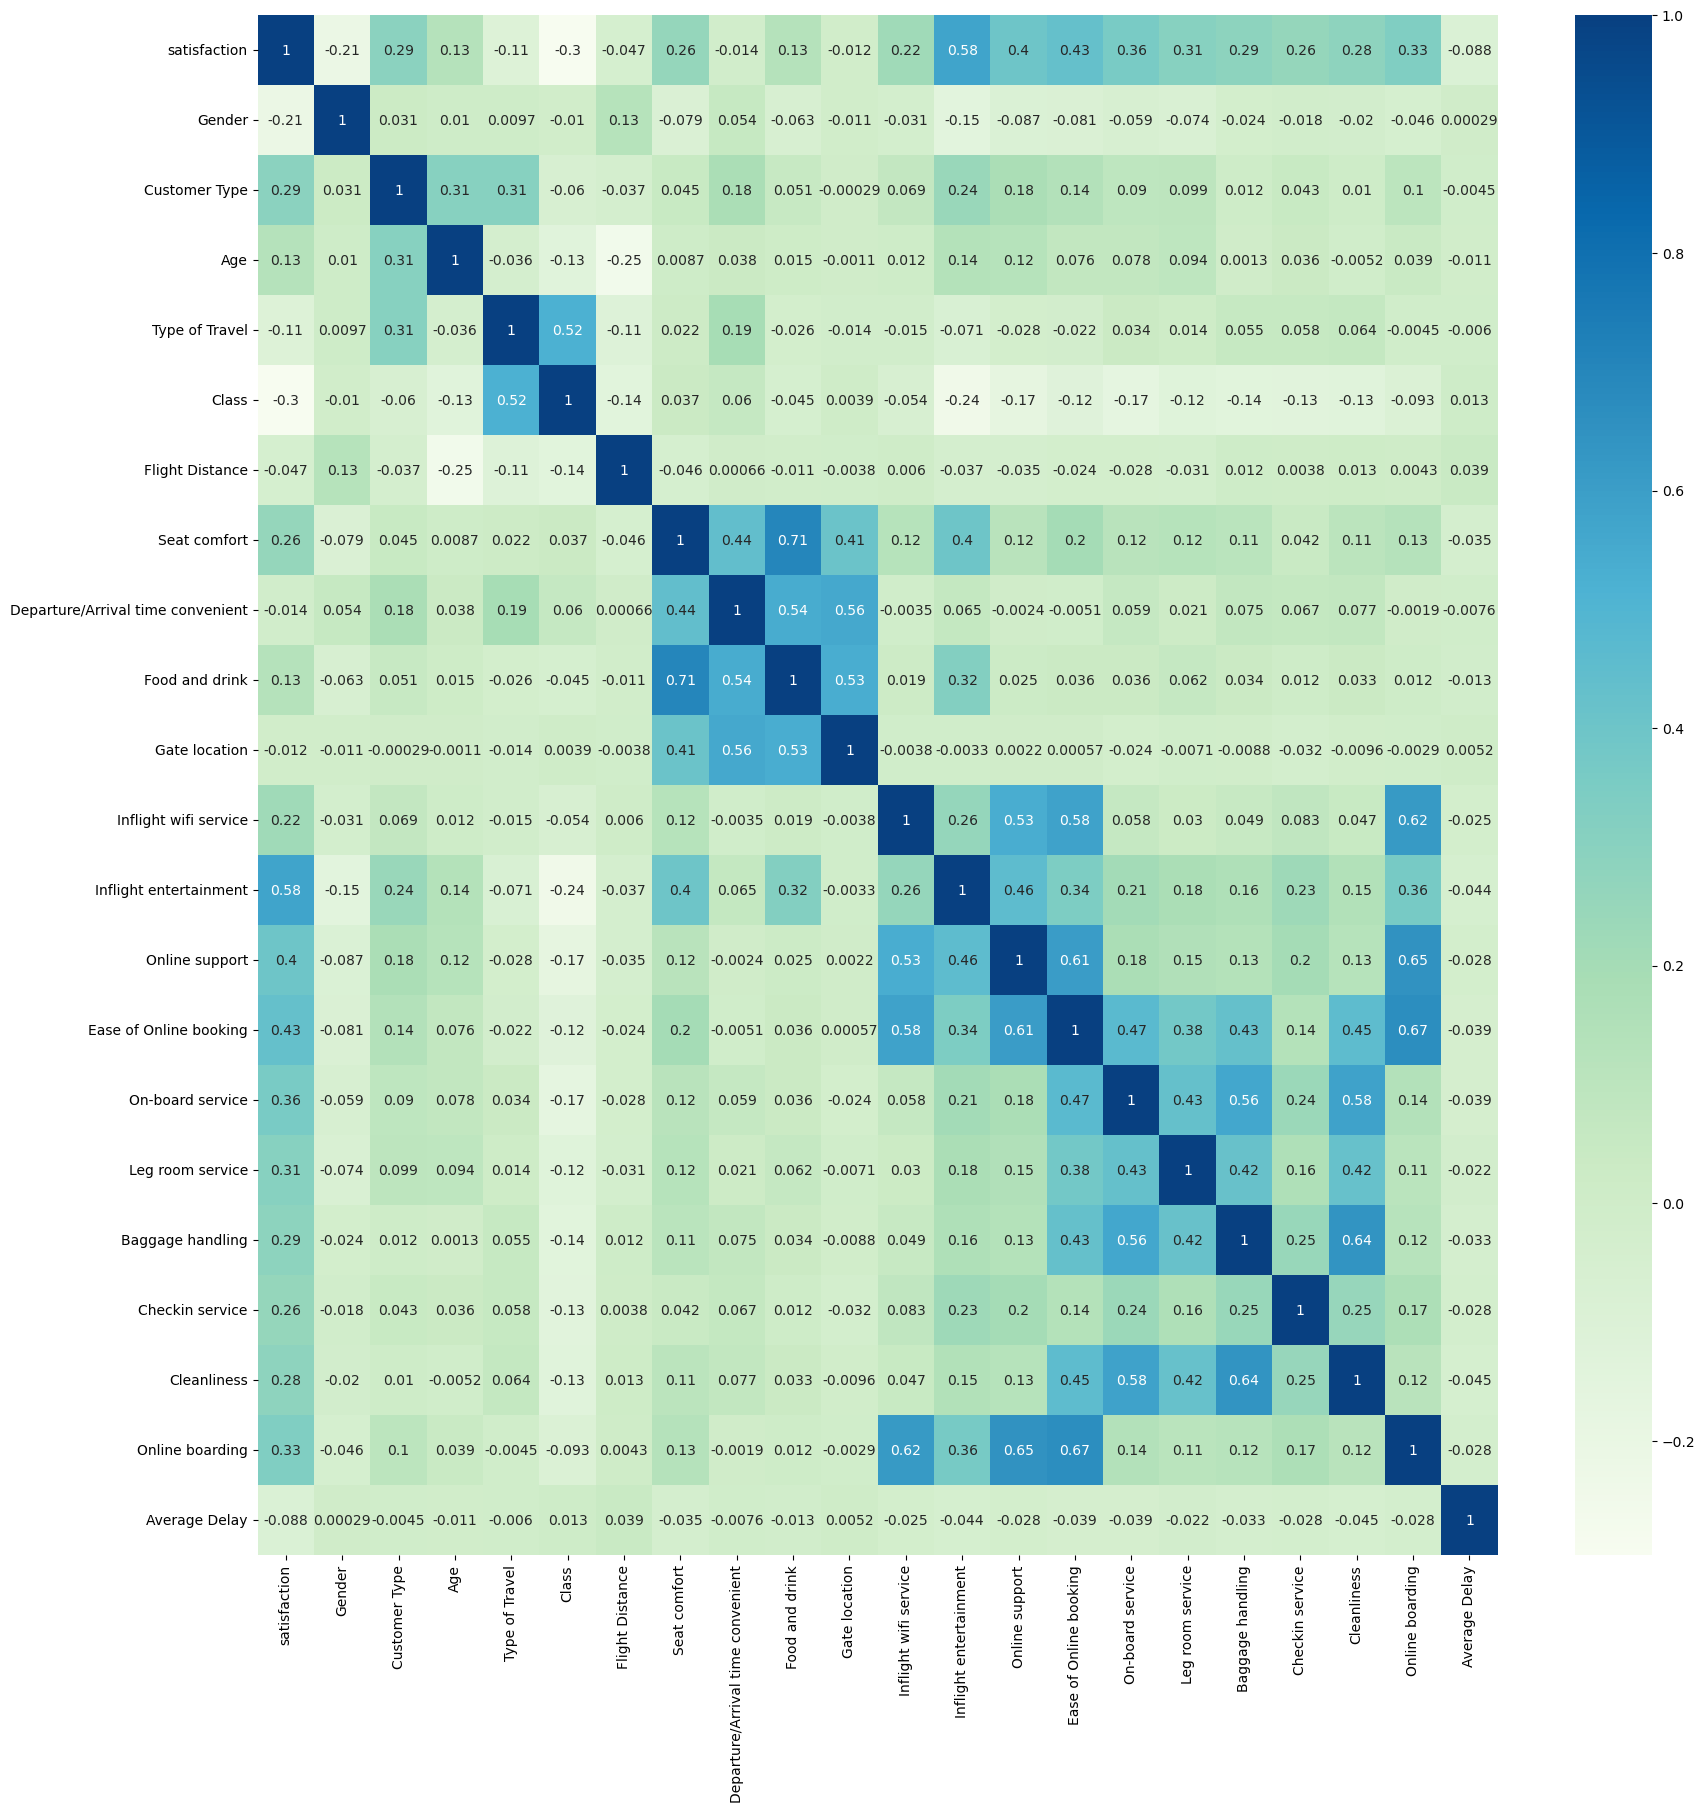

In [538]:
# correlation matrix of all variables 
variables=list(df1.columns)

plt.figure(len(variables),figsize=(20,20))
correlation = df1[variables].corr(method='spearman')
sns.heatmap(correlation,cmap='GnBu',annot=True)        

In [539]:
# we will be dropping 'Age group',Departure Delay in Minutes','Arrival Delay in Minutes' and 'Flight Distance Interval' as these variables are represented in features under 'Age' and 'Average Delay'
#we also remove more variables as per their feature score as shown below in a barplot
#'seat comfort' and 'food & drink' show high positive correlation
# we drop 'food and drink ' as it shows lower correlation with the target variable ,we do this to avoid multi collinearity
X=df.drop(['satisfaction','Age group','Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance','Departure/Arrival time convenient','Gate location','Flight Distance Interval','Food and drink'],axis=1)
Y=df['satisfaction']# our target variable would be satisfaction , we will be predicting this variable

In [540]:
from sklearn.feature_selection import SelectKBest  # importing the required library
# SelectKBest to find the best features for our model
best = SelectKBest() 
best.fit(X,Y)
best_T = best.transform(X)


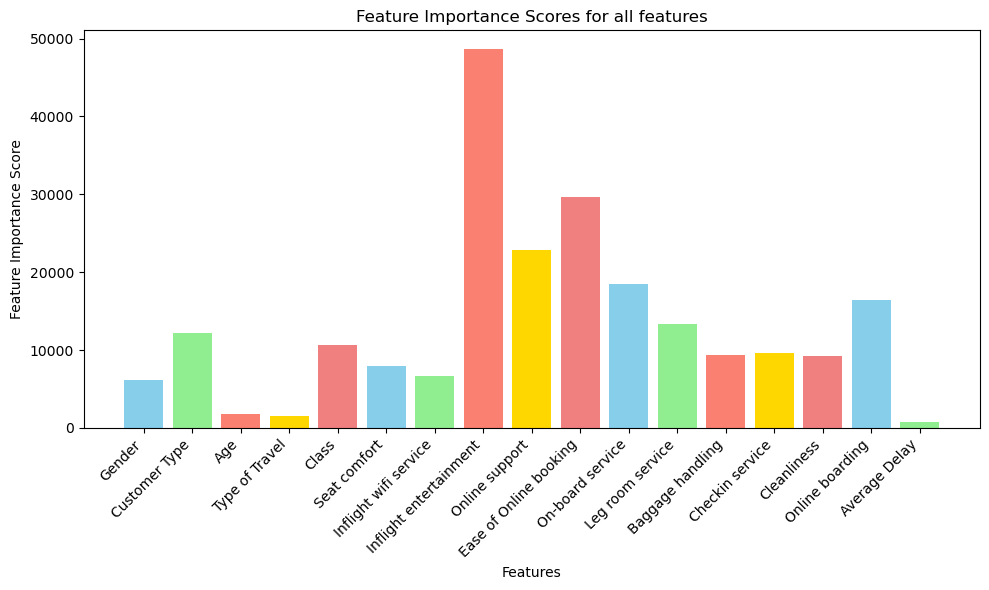

In [542]:
# using a barplot to visualize feature scores
# we select features for model building based on features with some level of significance with regard to  feature score
# getting the scores of all features
feature_scores = best.scores_

# getting  the names of all features
all_feature_names = X.columns

bar_colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']
plt.figure(figsize=(10,6))
plt.bar(all_feature_names, feature_scores, color=bar_colors)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Scores for all features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# the most important feature appears to be inflight entertainment
# the least important feature appears to be flight delay

# Model Building

In [543]:
# now we split the data into test set and train set
from sklearn.model_selection import train_test_split  # importing the required function 
X_traindata, X_testdata, Y_traindata, Y_testdata = train_test_split(X, Y, test_size=0.25, random_state=16)
# 75 % of the data is used to train our Machine Learning Model

In [544]:
X_traindata.shape, X_testdata.shape

((96138, 17), (32047, 17))

In [545]:
#let us scale the dataset
#first scale on the X_train dataset
from sklearn.preprocessing import StandardScaler # import required function
scaler=StandardScaler()
X_traindata=scaler.fit_transform(X_traindata)
X_testdata = scaler.transform(X_testdata)

In [546]:
#here we test the model and evaluate its performance with following metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# defining a condition to run on the machine learning model built to evaluate the performance of the model
def Performance(Y_testdata, prediction):
    print("Accuracy : {}%".format(accuracy_score(Y_testdata, prediction)*100))
    print("Precision: {}%".format(precision_score(Y_testdata, prediction)*100))
    print("Recall   : {}%".format(recall_score(Y_testdata, prediction)*100))
    print("F1       : {}%".format(f1_score(Y_testdata, prediction)*100))


In [547]:
# Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier   #importing the required library
model = DecisionTreeClassifier(max_depth=2, 
                               criterion='entropy',
                              min_samples_leaf=3)

In [548]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [549]:
model.fit(X_traindata, Y_traindata)  #here we fit the machine learning model with the training data

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3)

In [550]:
prediction = model.predict(X_testdata) 


[[10686  3786]
 [ 1812 15763]]


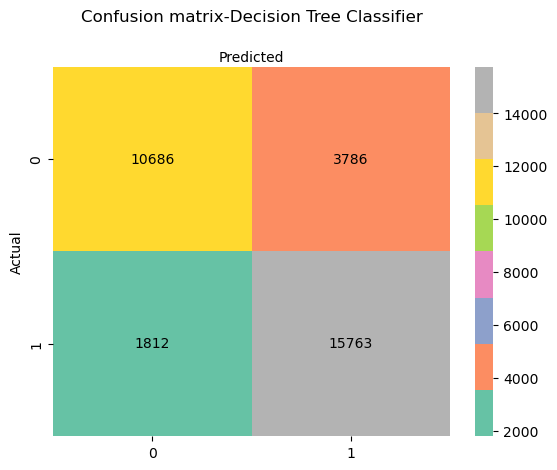

In [551]:
from sklearn import metrics  #importing the required library
# let us evaluate the  model through a confusion matrix
confuse=metrics.confusion_matrix(Y_testdata,prediction)
print(confuse)
#lets plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(confuse), annot=True, cmap="Set2" ,fmt="d",annot_kws={"color": "black"})
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix-Decision Tree Classifier', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [552]:
Performance(Y_testdata, prediction)  # we calculate the overall performance of the model

Accuracy : 82.53190626267669%
Precision: 80.63328047470459%
Recall   : 89.68990042674253%
F1       : 84.92080594763496%


In [553]:
# here we break down the perfomance of the model by the target variable predictions
# performance metric is calculated for each class
from sklearn.metrics import classification_report
target_names = ['dissatisfaction','satisfaction']
print(classification_report(Y_testdata,prediction, target_names=target_names))

                 precision    recall  f1-score   support

dissatisfaction       0.86      0.74      0.79     14472
   satisfaction       0.81      0.90      0.85     17575

       accuracy                           0.83     32047
      macro avg       0.83      0.82      0.82     32047
   weighted avg       0.83      0.83      0.82     32047



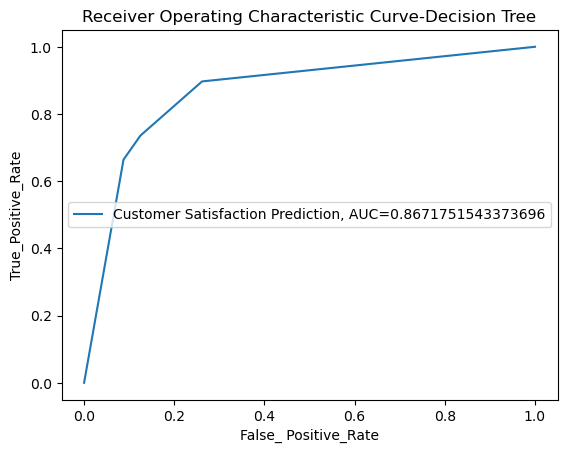

In [554]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_testdata)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_testdata,  y_pred_proba)
auc = metrics.roc_auc_score(Y_testdata, y_pred_proba)
plt.plot(fpr,tpr,label="Customer Satisfaction Prediction, AUC="+str(auc))
plt.ylabel("True_Positive_Rate")
plt.xlabel("False_ Positive_Rate")
plt.title("Receiver Operating Characteristic Curve-Decision Tree")
plt.savefig('Receiver Operating Characteristic Curve.png')
plt.legend()
plt.show()

In [555]:
# Random Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # importing the required function 
model = RandomForestClassifier(max_depth=2, 
                               criterion='entropy',
                              min_samples_leaf=3)
model.get_params()   # exploring the parameters of the random tree classifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [556]:
# now we fit the model
# we fit the model with x and y training data
model.fit(X_traindata,Y_traindata)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3)

In [557]:
prediction=model.predict(X_testdata)

[[11795  2677]
 [ 2136 15439]]


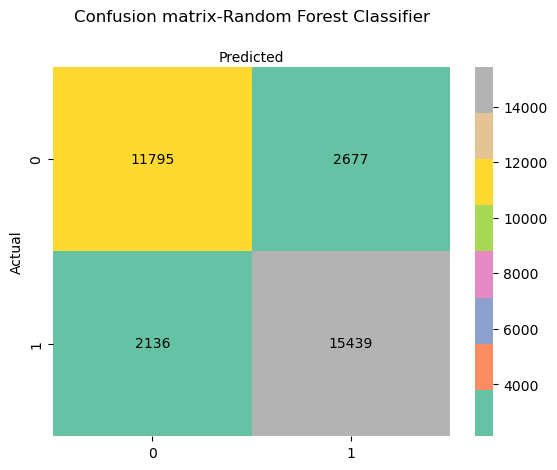

In [558]:
# let us evaluate the  model through a confusion matrix
confuse=metrics.confusion_matrix(Y_testdata,prediction)
print(confuse)
#lets plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(confuse), annot=True, cmap="Set2" ,fmt="d",annot_kws={"color": "black"})
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix-Random Forest Classifier', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [559]:
Performance(Y_testdata,prediction)  # we evalaute the overall performance of the machine learning model

Accuracy : 84.98143351951822%
Precision: 85.22300728637668%
Recall   : 87.84637268847794%
F1       : 86.51480765459078%


In [560]:
# here we break down the perfomance of the model by the target variable predictions
# performance metric is calculated for each class
print(classification_report(Y_testdata,prediction, target_names=target_names))

                 precision    recall  f1-score   support

dissatisfaction       0.85      0.82      0.83     14472
   satisfaction       0.85      0.88      0.87     17575

       accuracy                           0.85     32047
      macro avg       0.85      0.85      0.85     32047
   weighted avg       0.85      0.85      0.85     32047



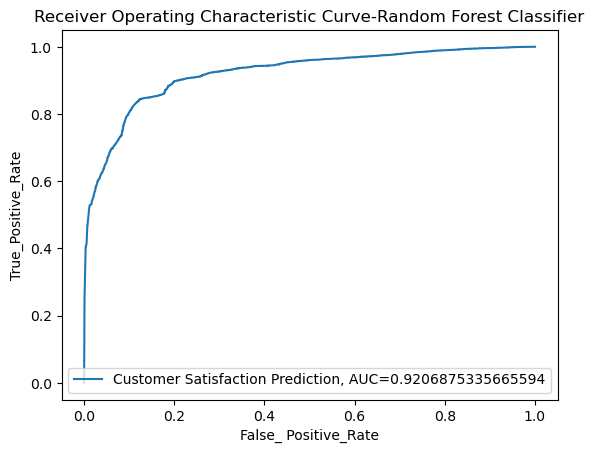

In [561]:
y_pred_proba = model.predict_proba(X_testdata)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_testdata,  y_pred_proba)
auc = metrics.roc_auc_score(Y_testdata, y_pred_proba)
plt.plot(fpr,tpr,label="Customer Satisfaction Prediction, AUC="+str(auc))
plt.ylabel("True_Positive_Rate")
plt.xlabel("False_ Positive_Rate")
plt.title("Receiver Operating Characteristic Curve-Random Forest Classifier")
plt.savefig('Receiver Operating Characteristic Curve.png')
plt.legend()
plt.show()

In [562]:
#XGBoost Classification Model
import xgboost  # importing the required library
model=xgboost.XGBClassifier(max_depth=2, 
                               criterion='entropy',
                              min_samples_leaf=3)
model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'criterion': 'entropy',
 'min_samples_leaf': 3}

In [563]:
model.fit(X_traindata,Y_traindata)  # fitting the model with X and Y training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, min_samples_leaf=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

In [564]:
prediction=model.predict(X_testdata)

[[13182  1290]
 [ 1138 16437]]


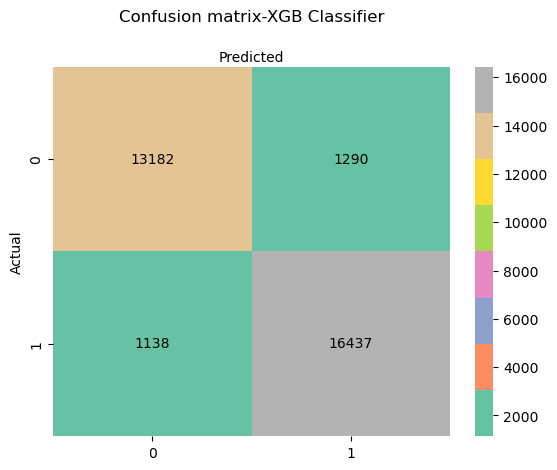

In [565]:
# let us evaluate the  model through a confusion matrix
confuse=metrics.confusion_matrix(Y_testdata,prediction)
print(confuse)
#lets plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(confuse), annot=True, cmap="Set2" ,fmt="d",annot_kws={"color": "black"})
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix-XGB Classifier', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [566]:
Performance(Y_testdata,prediction)    # we evalaute the overall performance of the machine learning model

Accuracy : 92.42362779667363%
Precision: 92.72296496869183%
Recall   : 93.52489331436699%
F1       : 93.12220270806188%


In [567]:
# here we break down the perfomance of the model by the target variable predictions
# performance metric is calculated for each class
print(classification_report(Y_testdata,prediction, target_names=target_names))

                 precision    recall  f1-score   support

dissatisfaction       0.92      0.91      0.92     14472
   satisfaction       0.93      0.94      0.93     17575

       accuracy                           0.92     32047
      macro avg       0.92      0.92      0.92     32047
   weighted avg       0.92      0.92      0.92     32047



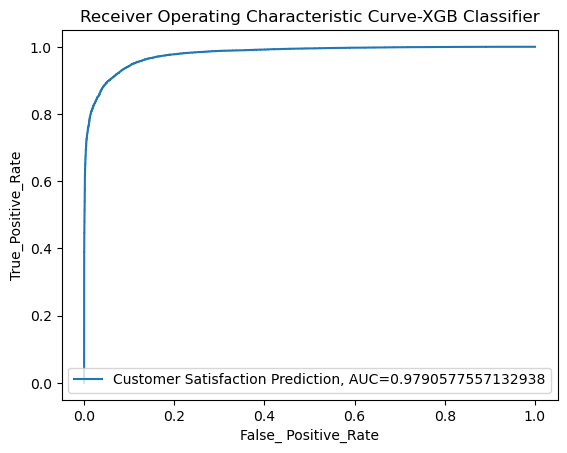

In [568]:
y_pred_proba = model.predict_proba(X_testdata)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_testdata,  y_pred_proba)
auc = metrics.roc_auc_score(Y_testdata, y_pred_proba)
plt.plot(fpr,tpr,label="Customer Satisfaction Prediction, AUC="+str(auc))
plt.ylabel("True_Positive_Rate")
plt.xlabel("False_ Positive_Rate")
plt.title("Receiver Operating Characteristic Curve-XGB Classifier")
plt.savefig('Receiver Operating Characteristic Curve.png')
plt.legend()
plt.show()

In [569]:
pip install catboost  # installing the required package

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [570]:
# Catboost Classifier Model
import catboost
model=catboost.CatBoostClassifier(verbose=0)
model.get_params()  # getting the parameters of the catboost classification model

{'verbose': 0}

In [571]:
# fitting the model with X and  Y training data
model.fit(X_traindata,Y_traindata)

In [572]:
prediction=model.predict(X_testdata)  

[[13865   607]
 [  813 16762]]


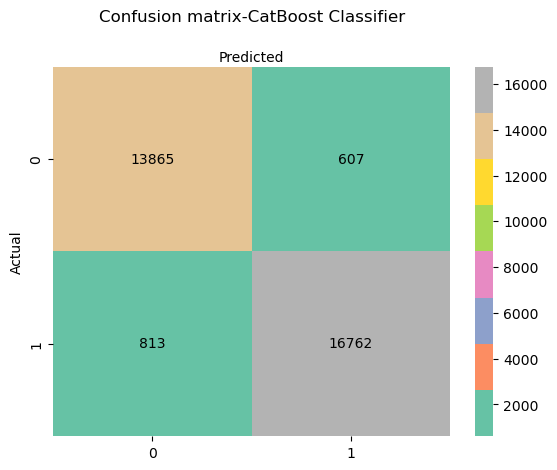

In [573]:
# let us evaluate the  model through a confusion matrix
confuse=metrics.confusion_matrix(Y_testdata,prediction)
print(confuse)
#lets plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(confuse), annot=True, cmap="Set2" ,fmt="d",annot_kws={"color": "black"})
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix-CatBoost Classifier', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [574]:
Performance(Y_testdata,prediction)    # we evalaute the overall performance of the machine learning model

Accuracy : 95.5690080194714%
Precision: 96.50526800621797%
Recall   : 95.37411095305832%
F1       : 95.9363553113553%


In [575]:
# here we break down the perfomance of the model by the target variable predictions
# performance metric is calculated for each class
print(classification_report(Y_testdata,prediction, target_names=target_names))

                 precision    recall  f1-score   support

dissatisfaction       0.94      0.96      0.95     14472
   satisfaction       0.97      0.95      0.96     17575

       accuracy                           0.96     32047
      macro avg       0.95      0.96      0.96     32047
   weighted avg       0.96      0.96      0.96     32047



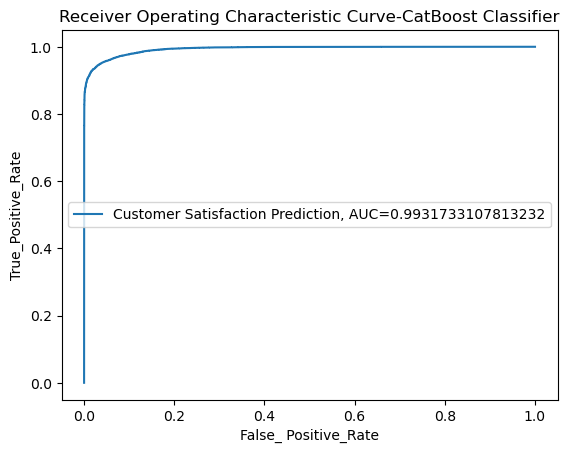

In [576]:
y_pred_proba = model.predict_proba(X_testdata)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_testdata,  y_pred_proba)
auc = metrics.roc_auc_score(Y_testdata, y_pred_proba)
plt.plot(fpr,tpr,label="Customer Satisfaction Prediction, AUC="+str(auc))
plt.ylabel("True_Positive_Rate")
plt.xlabel("False_ Positive_Rate")
plt.title("Receiver Operating Characteristic Curve-CatBoost Classifier")
plt.savefig('Receiver Operating Characteristic Curve.png')
plt.legend()
plt.show()

In [577]:
pip install lightgbm  # installing the required package

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [578]:
import lightgbm  #importing the required library
# LightGBM Classification Model
model=lightgbm.LGBMClassifier()
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [579]:
model.fit(X_traindata, Y_traindata)  # fitting the model with X and  Y training data

[LightGBM] [Info] Number of positive: 52833, number of negative: 43305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 96138, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549554 -> initscore=0.198868
[LightGBM] [Info] Start training from score 0.198868


LGBMClassifier()

In [580]:
prediction=model.predict(X_testdata)

[[13713   759]
 [  860 16715]]


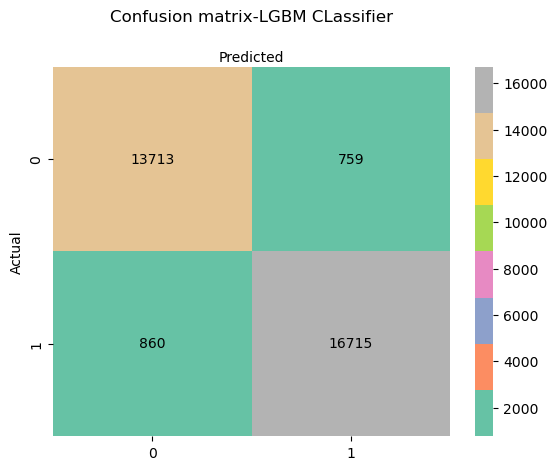

In [581]:
# let us evaluate the  model through a confusion matrix
confuse=metrics.confusion_matrix(Y_testdata,prediction)
print(confuse)
#lets plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(confuse), annot=True, cmap="Set2" ,fmt="d",annot_kws={"color": "black"})
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix-LGBM CLassifier', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [582]:
Performance(Y_testdata,prediction)   # we evalaute the overall performance of the machine learning model

Accuracy : 94.94804505881986%
Precision: 95.65640379993133%
Recall   : 95.10668563300142%
F1       : 95.38075266056093%


In [583]:
# here we break down the perfomance of the model by the target variable predictions
# performance metric is calculated for each class
print(classification_report(Y_testdata,prediction, target_names=target_names))

                 precision    recall  f1-score   support

dissatisfaction       0.94      0.95      0.94     14472
   satisfaction       0.96      0.95      0.95     17575

       accuracy                           0.95     32047
      macro avg       0.95      0.95      0.95     32047
   weighted avg       0.95      0.95      0.95     32047



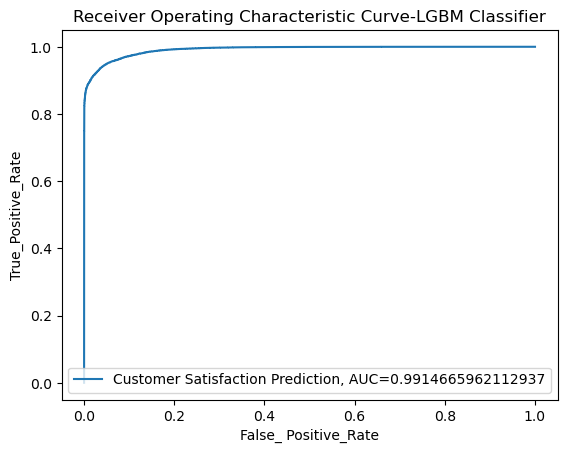

In [584]:
y_pred_proba = model.predict_proba(X_testdata)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_testdata,  y_pred_proba)
auc = metrics.roc_auc_score(Y_testdata, y_pred_proba)
plt.plot(fpr,tpr,label="Customer Satisfaction Prediction, AUC="+str(auc))
plt.ylabel("True_Positive_Rate")
plt.xlabel("False_ Positive_Rate")
plt.title("Receiver Operating Characteristic Curve-LGBM Classifier")
plt.savefig('Receiver Operating Characteristic Curve.png')
plt.legend()
plt.show()

In [588]:
#  creating a table with the results for each model
results = {
    "Decision Tree Classifier": [82.53, 80.63, 89.69, 84.92, 86.72],
    "Random Forest Classifier": [84.98, 85.22, 87.85, 86.51, 92.07],
    "XGB CLassifier": [92.42, 92.72, 93.52, 93.12, 97.91],
    "Catboost CLassifier": [95.57, 96.51, 95.37, 95.94, 99.32],
    "LGBM Classifier": [94.95, 95.66, 95.11, 95.38, 99.15]
}

result= pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
result


,Decision Tree Classifier,Random Forest Classifier,XGB CLassifier,Catboost CLassifier,LGBM Classifier
Accuracy,82.53,84.98,92.42,95.57,94.95
Precision,80.63,85.22,92.72,96.51,95.66
Recall,89.69,87.85,93.52,95.37,95.11
F1,84.92,86.51,93.12,95.94,95.38
ROC-AUC,86.72,92.07,97.91,99.32,99.15


# Hyper-Parameter Tuning

In [253]:
#  Hyperparameter Tuning for the best model # CatBoost Classification Model
# the catboost model has the best performance when compared  across the different performance metric

In [ ]:
# importing the required library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#cross validate the data using RepeatedStratifiedKFold
#n_splits refers to the number of subsets the data will be split into for each fold
#n_repeats refers to the number of times the cross validation process takes place
cross = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=123)

In [ ]:
parameter_dictionary= {
    'n_estimators': [50, 70, 100, 150],
    'max_depth':[2,4,5,6]
}

In [ ]:
from catboost import CatBoostClassifier   # importing the required classification library
Grid_Search= GridSearchCV(CatBoostClassifier(verbose=0),
                          param_grid=parameter_dictionary,
                          scoring='accuracy',
                          cv=cross,
                          n_jobs=-1,
                          verbose=10)

In [ ]:
Grid_Search.fit(X_traindata, Y_traindata)

In [ ]:
Grid_Search.best_params_  # getting the best set of hyperparameters found during the grid search process

In [ ]:
best_grid_estimator=Grid_Search.best_estimator_
best_grid_estimator # best estimator from the grid search process

In [ ]:
# Make predictions using the best estimator
y_prediction = Grid_Search.best_estimator_.predict(X_testdata)
y_prediction[0:50]  # exploring predictions

In [ ]:
Performance(Y_testdata,y_prediction)   # we evalaute the overall performance of the machine learning model

In [ ]:
# here we break down the perfomance of the model by the target variable predictions
# performance metric is calculated for each class
print(classification_report(Y_testdata,prediction, target_names=target_names))

In [ ]:
# we see there isnt  really much of a change in the accuracy_score after hyperparameter tuning 
# we may  stick to the original  machine learning model (catboost classifier)